# EDA & Preprocessing for Regression Dataset

## Setup & Imports

In [1]:
import numpy as np
import pandas as pd

from data.loaders import load_dataset

## 1. Load Data

In [2]:
df = load_dataset("regression")

## 2. Initial Data Inspection

- Summary of dataset dimensions (number of rows and columns). For example, "The dataset contains 10,000 rows and 15 columns."
- Overview of each column’s data type (numeric, categorical, datetime), and counts of non-null entries. For instance, "Column A is numeric with 95% non-null values."
- A tally of missing values, with a quick interpretation: "Column X has 12% missing—this will require imputation or removal."
- Any immediate red flags (e.g., "Column Y has all-zero values," "Column Z has only one unique value," or "There are 50 duplicated rows").

In [ ]:
# Summary of dataset dimensions
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Overview of each column’s data type and counts of non-null entries
print("\nDataFrame info:")
df.info()

# Missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
if missing_values.sum() == 0:
    print("No missing values found.")
else:
    display(missing_values[missing_values > 0])

# Check for duplicated rows
duplicated_rows = df.duplicated().sum()
print(f"\nNumber of duplicated rows: {duplicated_rows}")

Dataset contains 20640 rows and 10 columns.

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20640 non-null  int64  
 1   MedInc      20640 non-null  float64
 2   HouseAge    20640 non-null  float64
 3   AveRooms    20640 non-null  float64
 4   AveBedrms   20640 non-null  float64
 5   Population  20640 non-null  float64
 6   AveOccup    20640 non-null  float64
 7   Latitude    20640 non-null  float64
 8   Longitude   20640 non-null  float64
 9   target      20640 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.6 MB

Missing Values:
No missing values found.

Number of duplicated rows: 0


## 3. Univariate Descriptions

- A table of descriptive statistics for each numeric column: mean, standard deviation, minimum, maximum, and quartiles.
- Highlights of features whose distributions are heavily skewed or have extreme outliers. Consider using histograms or box plots to visualize these distributions.
- A narrative on the target variable: its range, central tendency, and whether it’s approximately bell-shaped, heavy-tailed, or multimodal.
- Notes on any categorical or discrete columns: number of categories, imbalanced levels, or rare values. For example, "Category A has 90% of the data, while Category B has only 1%."

Descriptive Statistics:


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.001572,0.031814,0.045746,-0.018796,-0.051215,0.029675,-0.048644,-0.000169,0.016618,-0.009604,-2.569958
std,1.002561,0.987995,0.959022,0.945498,1.001145,1.056827,0.953474,1.023710,0.989422,0.977301,173.703821
min,-2.772167,-3.238225,-3.058743,-3.597388,-3.575683,-4.094310,-2.937542,-3.268089,-3.757972,-2.795434,-549.585774
25%,-0.678711,-0.654862,-0.635983,-0.654438,-0.708902,-0.687377,-0.691033,-0.633057,-0.691641,-0.630333,-118.398803
50%,0.026206,0.063444,0.040020,0.013762,-0.057959,0.028006,-0.076591,0.000901,-0.002483,-0.032677,-3.048715
75%,0.664547,0.677848,0.699246,0.601481,0.606776,0.726499,0.633085,0.686454,0.714803,0.633049,116.990415
max,3.470995,2.807548,2.911758,3.470353,2.933371,3.243470,2.810588,3.023554,2.851715,3.047925,510.873284


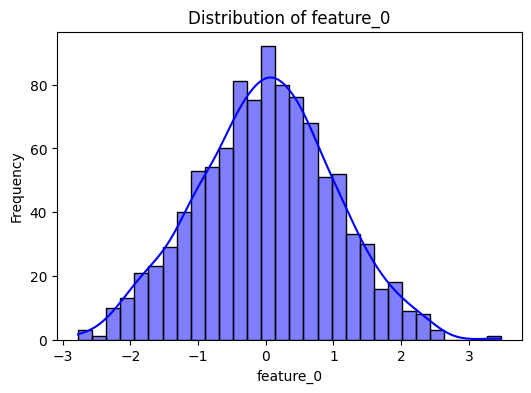

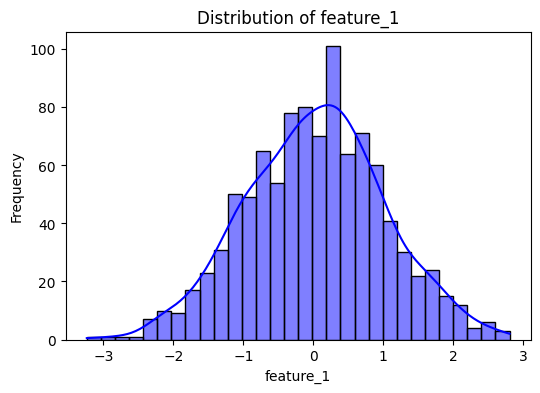

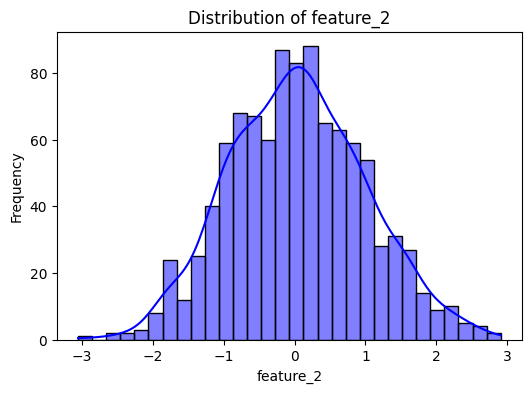

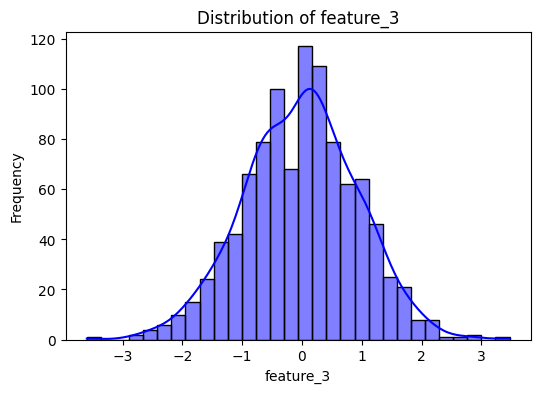

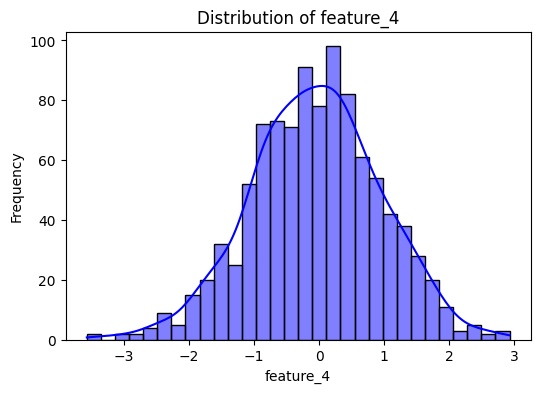

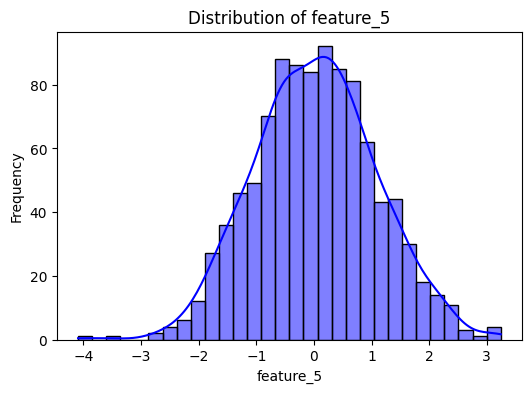

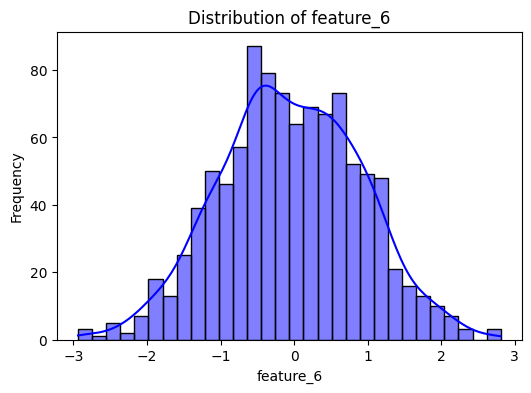

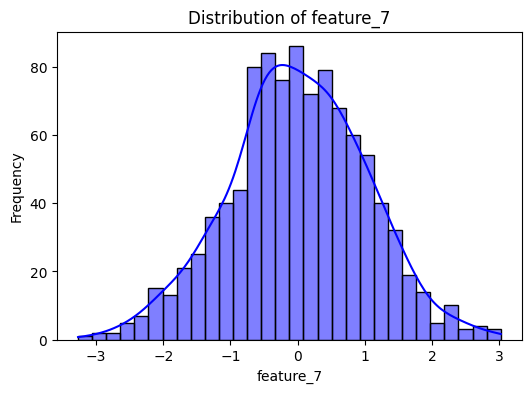

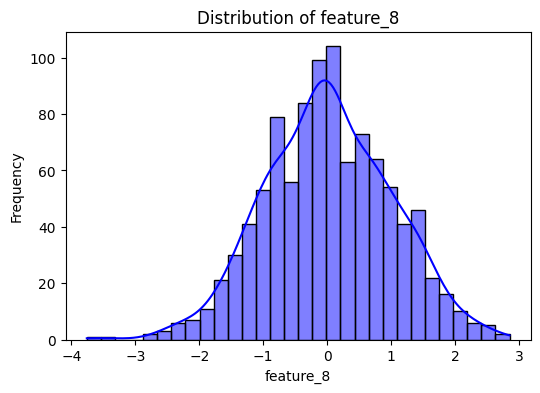

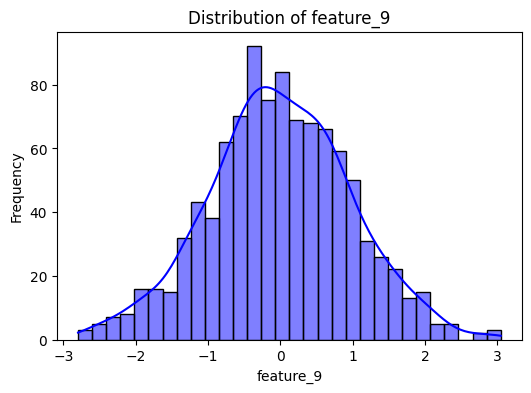

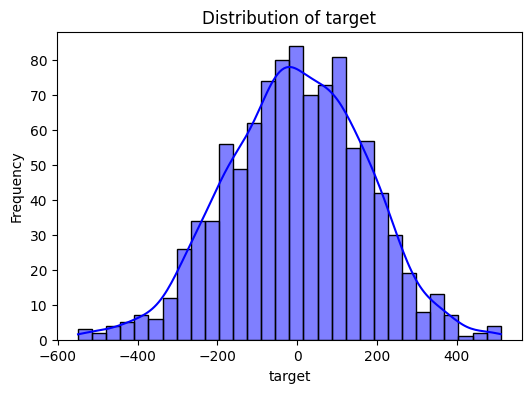

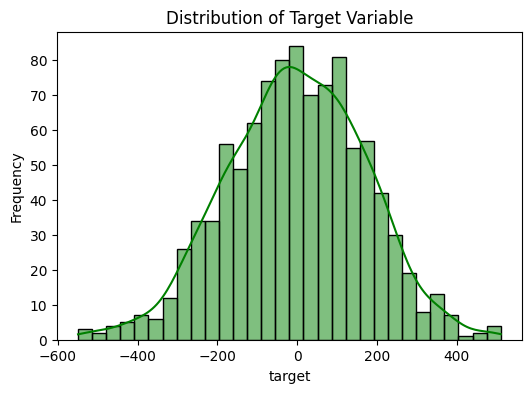


Skewness of Numeric Features:
feature_0   -0.018235
feature_1   -0.023013
feature_2    0.112827
feature_3   -0.063636
feature_4   -0.093466
feature_5    0.034818
feature_6   -0.012115
feature_7   -0.054622
feature_8   -0.039493
feature_9   -0.000626
target      -0.105430
dtype: float64

Features with High Skewness:
Series([], dtype: float64)


In [5]:
# Descriptive statistics for numeric columns
descriptive_stats = df.describe()
print("Descriptive Statistics:")
display(descriptive_stats)

# Visualize distributions of numeric features
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numeric features
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Analyze the target variable
target_col = 'target'
plt.figure(figsize=(6, 4))
sns.histplot(df[target_col], kde=True, bins=30, color='green')
plt.title("Distribution of Target Variable")
plt.xlabel(target_col)
plt.ylabel("Frequency")
plt.show()

# Check for skewness and outliers in numeric features
from scipy.stats import skew

skewness = df[numeric_columns].apply(skew)
print("\nSkewness of Numeric Features:")
print(skewness)

# Highlight features with high skewness
high_skew = skewness[abs(skewness) > 1]
print("\nFeatures with High Skewness:")
print(high_skew)

## 4. Outlier & Missing-Value Analysis

- Identification of outliers using summary rules (e.g., values beyond 1.5× IQR or Z-scores greater than `threshold`). For example, "Feature X has 5 outliers beyond 1.5× IQR."
- A discussion of whether to cap, transform, drop them, or leave them as they are. For instance, "Outliers in Feature Y will be capped at the 99th percentile."
- A plan for missing-data handling: which columns to impute (mean, median, KNN), which to drop entirely, and any domain-specific logic (e.g., missing means "unknown").
- A short risk assessment: "Dropping rows will reduce n by 10%; imputing may bias Feature Y."

## 5. Correlation Analysis

- Create a correlation matrix heatmap to visualize pairwise linear relationships among numeric features and the target variable. If the data distribution is far from normal, use Spearman or Kendall correlation methods instead of Pearson.
  - Example: "Feature A and Feature B have a correlation of 0.95, indicating potential multicollinearity."
- Highlight features with strong correlations that might indicate redundancy or multicollinearity concerns. Discuss whether these features should be removed or transformed.
- Discuss any surprising relationships. For instance, "Feature Y and Feature Z are highly correlated despite no obvious domain link."
- Provide guidance on potential feature selection or dimensionality reduction steps. For example:
  - "Features with correlations above 0.8 will be considered for removal to avoid multicollinearity."
  - "Principal Component Analysis (PCA) may be applied to reduce dimensionality while retaining most of the variance."

## 6. Multivariate Exploration

- A description of pairwise scatter patterns among top-correlated features and with the target—what shapes (linear, curved, clusters) you see. For example, 
  - "Feature A and Feature B show a linear relationship with some clustering."
  - "Feature X has a strong positive correlation with the target, suggesting it may be a good predictor."
- Insights from a low-dimensional projection (like PCA): whether data forms distinct groups, follows a simple manifold, or exhibits strange clustering. Consider using pair plots or PCA visualizations.
- Any interaction effects you note (e.g., "Feature A only matters when Feature B is high").
- Optional thoughts on unsupervised patterns (e.g., k-means segments) if they seem relevant to downstream stratification or modeling.

## 7. Feature Engineering Plan

- A bullet list of transformations you intend to apply: log or power transforms for skewed distributions, scaling or normalization for models that require it.
- Ideas for derived features: interactions, polynomial terms, binning of continuous variables, or aggregations if relevant.
- Notes on how to encode categorical variables (one-hot, ordinal) and any thresholds (e.g., group rare categories under "Other").
- A rationale for each choice—how it might help bagging, boosting, or stacking models.
- Validate the effectiveness of engineered features by checking feature importance scores or model performance after training.

## 8. Preprocessing Pipeline Outline

- Short, step-by-step list of the operations in the order they should run in pipeline:
  1. Missing-value imputation
  2. Outlier capping or removal (and optional imputation of removed outliers)
  3. Feature transforms and scaling
  4. Train/test split configuration -- only if data analysis suggests that specific train/test split could be beneficial / is mandatory (for example time series data)